# NYC Property Sales Dataset 

"NYC Property Sales." Ini adalah dataset yang berisi informasi tentang penjualan properti di Kota New York, Amerika Serikat. Dataset ini memiliki berbagai fitur yang memberikan gambaran tentang transaksi properti, termasuk detail mengenai properti dan penjualan. Dataset ini umumnya digunakan untuk analisis properti dan pemodelan prediktif terkait pasar perumahan di Kota New York.

Berikut adalah beberapa fitur utama dalam dataset "NYC Property Sales" dan penjelasannya:
1. BOROUGH: Daerah (borough) di Kota New York tempat properti berada. Kota New York terdiri dari lima borough: Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5).
2. NEIGHBORHOOD: Nama lingkungan di mana properti terletak.
3. BUILDING CLASS CATEGORY: Kategori kelas bangunan yang menggambarkan tipe properti, misalnya, "Condos - Elevator Apartments."
4. TAX CLASS AT PRESENT: Kode kelas pajak properti pada saat penjualan.
5. BLOCK: Nomor blok properti.
6. LOT: Nomor lot properti.
7. BUILDING CLASS AT PRESENT: Kode kelas bangunan pada saat penjualan.
8. ADDRESS: Alamat properti.
9. ZIP CODE : kode pos
10. APARTMENT NUMBER: Nomor apartemen (jika ada).
11. RESIDENTIAL UNITS: Jumlah unit tempat tinggal di properti.
12. COMMERCIAL UNITS: Jumlah unit komersial di properti.
13. TOTAL UNITS: Total jumlah unit di properti (termasuk unit tempat tinggal dan komersial).
14. LAND SQUARE FEET: Luas tanah properti dalam kaki persegi.
15. GROSS SQUARE FEET: Luas bangunan dalam faki persegi.
16. YEAR BUILT: Tahun pembangunan properti.
17. TAX CLASS AT TIME OF SALE: Kode kelas pajak properti pada saat penjualan.
18. BUILDING CLASS AT TIME OF SALE: Kode kelas bangunan pada saat penjualan.
19. SALE PRICE: Harga penjualan properti.
20. SALE DATE: Tanggal penjualan properti.

Dataset ini digunakan untuk menganalisis tren penjualan properti, memprediksi harga penjualan, dan melakukan berbagai analisis terkait real estate di Kota New York. 

In [16]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [17]:
df_property = pd.read_csv('nyc-rolling-sales.csv')

In [18]:
df_property.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [19]:
df_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [20]:
df_property.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [21]:
columns_to_drop = ['Unnamed: 0', 'EASE-MENT','APARTMENT NUMBER', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BLOCK', 'LOT']
df_property = df_property.drop(columns=columns_to_drop)

In [22]:
df_property.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [23]:
# Mengecek adanya nilai kosong (missing values)
missing_values = df_property.isnull().sum()
print("Jumlah nilai kosong (missing values) per kolom:")
print(missing_values)

Jumlah nilai kosong (missing values) per kolom:
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64


In [24]:
df_property.head(30)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,516 EAST 12TH STREET,10009,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,210 AVENUE B,10009,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,520 EAST 14TH STREET,10009,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,141 AVENUE D,10009,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,629 EAST 5TH STREET,10009,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [25]:

# Mengganti semua tanda '-' dengan '0' dalam kolom-kolom tertentu
columns_to_replace = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']

for column in columns_to_replace:
    df_property[column] = df_property[column].replace('-', '0')

# Konversi kolom-kolom yang telah diganti ke tipe data numerik
df_property[columns_to_replace] = df_property[columns_to_replace].astype(float)

ValueError: could not convert string to float: ' -  '

In [26]:
# Mengganti ' -  ' dengan '0' tanpa spasi ekstra
df_property.replace(' -  ', '0', inplace=True)

# Konversi kolom-kolom yang telah diganti ke tipe data numerik
columns_to_replace = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']
df_property[columns_to_replace] = df_property[columns_to_replace].astype(float)

In [27]:
df_property.tail(20)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84528,5,WOODROW,02 TWO FAMILY DWELLINGS,10 TRINA LANE,10309,2,0,2,3936.0,1470.0,2004,1,B9,550000.0,2017-06-20 00:00:00
84529,5,WOODROW,02 TWO FAMILY DWELLINGS,118 TURNER STREET,10309,2,0,2,6268.0,2206.0,2010,1,B9,545000.0,2016-11-16 00:00:00
84530,5,WOODROW,02 TWO FAMILY DWELLINGS,125 CLAY PIT ROAD,10309,2,0,2,10935.0,2683.0,1998,1,B2,800000.0,2017-01-09 00:00:00
84531,5,WOODROW,02 TWO FAMILY DWELLINGS,65 SHARROTTS LANE,10309,2,0,2,4300.0,2170.0,1998,1,B9,642500.0,2017-06-22 00:00:00
84532,5,WOODROW,02 TWO FAMILY DWELLINGS,67 SHARROTTS LANE,10309,2,0,2,4700.0,2170.0,1998,1,B9,408092.0,2016-09-26 00:00:00
84533,5,WOODROW,02 TWO FAMILY DWELLINGS,27 RED CEDAR LANE,10309,2,0,2,3985.0,2700.0,1996,1,B2,600000.0,2017-02-27 00:00:00
84534,5,WOODROW,02 TWO FAMILY DWELLINGS,30 HEMLOCK LANE,10309,2,0,2,3801.0,2704.0,1996,1,B9,610000.0,2016-12-05 00:00:00
84535,5,WOODROW,02 TWO FAMILY DWELLINGS,33 WHITE OAK LANE,10309,2,0,2,7885.0,2704.0,1996,1,B2,645000.0,2017-08-04 00:00:00
84536,5,WOODROW,02 TWO FAMILY DWELLINGS,19 SPRUCE LANE,10309,2,0,2,3800.0,2700.0,1996,1,B2,168000.0,2017-01-19 00:00:00
84537,5,WOODROW,02 TWO FAMILY DWELLINGS,48 WHITE OAK LANE,10309,2,0,2,4350.0,2840.0,1996,1,B2,625000.0,2016-10-18 00:00:00


In [28]:
# Mengubah kolom SALE DATE menjadi tipe data datetime
df_property['SALE DATE'] = pd.to_datetime(df_property['SALE DATE'])

In [29]:
df_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  object        
 2   BUILDING CLASS CATEGORY         84548 non-null  object        
 3   ADDRESS                         84548 non-null  object        
 4   ZIP CODE                        84548 non-null  int64         
 5   RESIDENTIAL UNITS               84548 non-null  int64         
 6   COMMERCIAL UNITS                84548 non-null  int64         
 7   TOTAL UNITS                     84548 non-null  int64         
 8   LAND SQUARE FEET                84548 non-null  float64       
 9   GROSS SQUARE FEET               84548 non-null  float64       
 10  YEAR BUILT                      84548 non-null  int64         
 11  TA

In [30]:
df_property.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,0.0,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,0.0,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


# Mean

In [31]:
mean = df_property['SALE PRICE'].mean()

# Hasil mean akan tersimpan dalam variabel mean_sale_price
print("Mean SALE PRICE:", mean)

Mean SALE PRICE: 1056622.9941453375


In [32]:
# Format mean SALE PRICE dengan tiga angka di belakang koma
formatted_mean = f"{mean:.3f}"
formatted_mean

'1056622.994'

## Weighted mean

In [33]:
weighted_mean = np.sum(df_property['SALE PRICE'] * df_property['BOROUGH']) / np.sum(df_property['BOROUGH'])

# Hasil weighted mean akan tersimpan dalam variabel weighted_mean
print("Weighted Mean SALE PRICE:", weighted_mean)

Weighted Mean SALE PRICE: 740046.8071263199


## Geomethric mean

In [40]:
# Data penjualan
sale_prices = df_property['SALE PRICE']

# Hitung geometric mean
geometric_mean = np.exp(np.mean(np.log(sale_prices)))

print("Geometric Mean of SALE PRICE:", geometric_mean)

Geometric Mean of SALE PRICE: 0.0


In [42]:
# Data penjualan
sale_prices = df_property['SALE PRICE']

# mengganti nilai nol dengan 1e-10
sale_prices = [1e-10 if x == 0 else x for x in sale_prices]

# Hitung geometric mean
geometric_mean = np.exp(np.mean(np.log(sale_prices)))

print("Geometric Mean of SALE PRICE:", geometric_mean)

Geometric Mean of SALE PRICE: 13.24648914606811


## Harmonic mean

In [47]:
harmonic_mean = len(sale_prices) / np.sum(1.0 / np.array(sale_prices))

print("Harmonic Mean of SALE PRICE:", harmonic_mean)

Harmonic Mean of SALE PRICE: 3.410706361689733e-10


In [48]:
# Kolom-kolom yang akan diperiksa
kolom_pemeriksaan = ["RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS", "LAND SQUARE FEET", "GROSS SQUARE FEET", "YEAR BUILT"]

# Melakukan pemeriksaan nilai nol dalam kolom-kolom
for kolom in kolom_pemeriksaan:
    if (df_property[kolom] == 0).any():
        print(f"Kolom {kolom} mengandung nilai nol.")
    else:
        print(f"Kolom {kolom} tidak mengandung nilai nol.")

Kolom RESIDENTIAL UNITS mengandung nilai nol.
Kolom COMMERCIAL UNITS mengandung nilai nol.
Kolom TOTAL UNITS mengandung nilai nol.
Kolom LAND SQUARE FEET mengandung nilai nol.
Kolom GROSS SQUARE FEET mengandung nilai nol.
Kolom YEAR BUILT mengandung nilai nol.


# Median

In [49]:
df_property_sorted = df_property.sort_values(by="SALE PRICE", ascending=True)

df_property_sorted.tail()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
2050,1,FASHION,21 OFFICE BUILDINGS,1250 BROADWAY,10001,0,55,55,30750.0,645977.0,1969,4,O4,5.650000e+08,2016-11-01
6332,1,KIPS BAY,08 RENTALS - ELEVATOR APARTMENTS,460-520 2ND AVENUE,10016,894,8,902,141836.0,829024.0,1975,2,D6,6.200000e+08,2016-12-08
2557,1,FINANCIAL,21 OFFICE BUILDINGS,85 BROAD STREET,10004,0,1,1,42762.0,993569.0,1983,4,O4,6.520000e+08,2017-05-24
2559,1,FINANCIAL,21 OFFICE BUILDINGS,60 WALL STREET,10005,0,1,1,53632.0,1617206.0,1987,4,O4,1.040000e+09,2017-01-24
7447,1,MIDTOWN CBD,21 OFFICE BUILDINGS,245 PARK AVENUE,10167,0,35,35,81336.0,1586886.0,1966,4,O4,2.210000e+09,2017-05-05


In [50]:
median_ = np.median(df_property_sorted['SALE PRICE'])
print(median_)

415000.0


In [51]:
median_ = np.median(df_property_sorted['RESIDENTIAL UNITS'])
print(median_)

1.0


In [52]:
median_ = np.median(df_property_sorted['COMMERCIAL UNITS'])
print(median_)

0.0


# Mode

In [53]:
modus_borough = df_property["BOROUGH"].mode()

print("Modus dari BOROUGH adalah:")
print(modus_borough)

Modus dari BOROUGH adalah:
0    4
Name: BOROUGH, dtype: int64


In [54]:
modus_neighborhood = df_property["NEIGHBORHOOD"].mode()

print("Modus dari NEIGHBORHOOD adalah:")
print(modus_neighborhood)

Modus dari NEIGHBORHOOD adalah:
0    FLUSHING-NORTH
Name: NEIGHBORHOOD, dtype: object


In [55]:
modus_building_class_category = df_property["BUILDING CLASS CATEGORY"].mode()

print("Modus dari BUILDING CLASS CATEGORY adalah:")
print(modus_building_class_category)

Modus dari BUILDING CLASS CATEGORY adalah:
0    01 ONE FAMILY DWELLINGS                    
Name: BUILDING CLASS CATEGORY, dtype: object


In [56]:
modus_adress = df_property["ADDRESS"].mode()

print("Modus dari ADDRESS adalah:")
print(modus_adress)

Modus dari ADDRESS adalah:
0    131-05 40TH   ROAD
Name: ADDRESS, dtype: object


# Range

In [57]:
# Buat kolom "BULAN_TAHUN" yang berisi bulan dan tahun dari "SALE DATE"
df_property["BULAN_TAHUN"] = df_property["SALE DATE"].dt.to_period("M")

# Kelompokkan berdasarkan "BULAN_TAHUN" dan hitung agregasi "SALE PRICE" dengan sum
df_new = df_property.groupby("BULAN_TAHUN")["SALE PRICE"].sum().reset_index()

# Ubah nama kolom "SALE PRICE" menjadi sesuai dengan agregasi yang Anda inginkan, misalnya "TOTAL SALES"
df_new = df_new.rename(columns={"SALE PRICE": "TOTAL SALES"})

# Tampilkan DataFrame baru
print(df_new)

   BULAN_TAHUN   TOTAL SALES
0      2016-09  7.842562e+09
1      2016-10  6.184049e+09
2      2016-11  7.084841e+09
3      2016-12  1.052582e+10
4      2017-01  7.875755e+09
5      2017-02  5.490635e+09
6      2017-03  7.479973e+09
7      2017-04  6.004318e+09
8      2017-05  9.870463e+09
9      2017-06  8.385461e+09
10     2017-07  6.554480e+09
11     2017-08  6.037003e+09


In [58]:
df_new = df_new.sort_values(by="TOTAL SALES", ascending=True)
df_new

,BULAN_TAHUN,TOTAL SALES
5,2017-02,5.490635e+09
7,2017-04,6.004318e+09
11,2017-08,6.037003e+09
1,2016-10,6.184049e+09
10,2017-07,6.554480e+09
2,2016-11,7.084841e+09
6,2017-03,7.479973e+09
0,2016-09,7.842562e+09
4,2017-01,7.875755e+09
9,2017-06,8.385461e+09


In [59]:
np.ptp(df_new['TOTAL SALES'])

5035186816.0

# Variance

In [60]:
# Menghitung varians dari kolom "RESIDENTIAL UNITS"
varians_residential_units = df_property["RESIDENTIAL UNITS"].var()

# Menghitung varians dari kolom "COMMERCIAL UNITS"
varians_commercial_units = df_property["COMMERCIAL UNITS"].var()

# Menampilkan hasil varians
print("Varians RESIDENTIAL UNITS:", varians_residential_units)
print("Varians COMMERCIAL UNITS:", varians_commercial_units)

Varians RESIDENTIAL UNITS: 279.59307883929864
Varians COMMERCIAL UNITS: 75.91956440873304


# Standard Deviation

In [61]:
std_dev = np.std(df_property['SALE PRICE'])

print("Standar Deviasi SALE PRICE:", std_dev)

Standar Deviasi SALE PRICE: 10387878.500448214


# Probability distribution

In [62]:
import matplotlib.pyplot as plt
from scipy.stats import norm

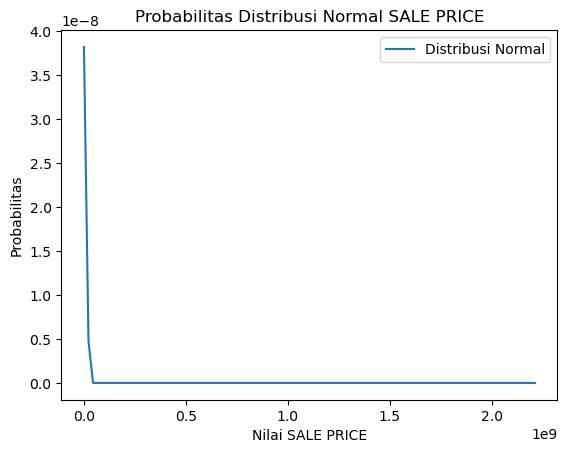

In [63]:
data_sale_price = df_property['SALE PRICE'].dropna()  # Drop missing values

# Membuat distribusi normal
x = np.linspace(min(data_sale_price), max(data_sale_price), 100)
pdf = norm.pdf(x, loc=mean, scale=std_dev)

# Plot distribusi normal
plt.plot(x, pdf, label='Distribusi Normal')
plt.xlabel('Nilai SALE PRICE')
plt.ylabel('Probabilitas')
plt.title('Probabilitas Distribusi Normal SALE PRICE')
plt.legend()
plt.show()

# Confidence Intervals

In [64]:
import scipy.stats as stats

# Tingkat kepercayaan
confidence_level = 0.95

# Menghitung mean, standar deviasi, dan jumlah pengamatan
sample_mean = np.mean(data_sale_price)
sample_std = np.std(data_sale_price, ddof=1)  # ddof=1 digunakan untuk menghitung sampel standar deviasi
n = len(data_sale_price)

# Menghitung margin of error
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, df=n-1) * (sample_std / np.sqrt(n))

# Menghitung confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"Confidence Interval SALE PRICE: ({lower_bound:.2f}, {upper_bound:.2f})")

Confidence Interval SALE PRICE: (986601.39, 1126644.60)


# Hypotesis Testing

Pengaruh Tahun Pembangunan terhadap Harga Jual

In [65]:
# Mengambil data YEAR BUILT dan SALE PRICE
data = df_property[['YEAR BUILT', 'SALE PRICE']].dropna()

# Menghitung korelasi Pearson dan p-value
correlation, p_value = stats.pearsonr(data['YEAR BUILT'], data['SALE PRICE'])

# Menampilkan hasil
print(f"Korelasi Pearson: {correlation:.2f}")
print(f"P-Value: {p_value:.5f}")

# Menginterpretasi hasil
alpha = 0.05  # Tingkat signifikansi
if p_value < alpha:
    print("Ada pengaruh yang signifikan antara tahun pembangunan dan harga jual.")
else:
    print("Tidak ada pengaruh yang signifikan antara tahun pembangunan dan harga jual.")

Korelasi Pearson: -0.00
P-Value: 0.72284
Tidak ada pengaruh yang signifikan antara tahun pembangunan dan harga jual.
